# Feature Selection Exercise

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

In [16]:
datafile = r'/Users/matt.fee/Projects/Mapping Data/Zillow-Demo/Data/Processed Data/zip_clean.csv'


## Prediction before removing correlated features

In [3]:
target_variable = 'Zip_PriceToRentRatio_AllHomes'
data = pd.read_csv(datafile)
data = data.set_index(['RegionName', 'Period'])
data_y = data[target_variable]
data_X = data.drop(target_variable, axis='columns')
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y)
reg = RandomForestRegressor()
#reg = MLPRegressor(hidden_layer_sizes=(25, 25, 25))
reg.fit(X_train, y_train)
print(reg.score(X_test, y_test))
print(reg.predict(X_test[:10]))
print(y_test[:10])

0.990337328693
[ 12.388  15.263  10.972  11.356  12.064   9.216   6.762  14.239  10.164
  10.022]
RegionName  Period 
53572       2014-09    13.19
98629       2014-01    16.08
12198       2013-09    11.14
80634       2012-12    11.80
86404       2012-06    12.04
98304       2013-11    10.98
63033       2012-02     6.96
18914       2015-03    14.65
55425       2015-10    10.68
15670       2015-03    10.79
Name: Zip_PriceToRentRatio_AllHomes, dtype: float64


## Correlated values

In [4]:
def plot_corr(df, size = 11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    cax = ax.matshow(corr, vmin=-1, vmax=1)
    fig.colorbar(cax, shrink = .8)
    ax.grid(True)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation = 'vertical')
    plt.yticks(range(len(corr.columns)), corr.columns)

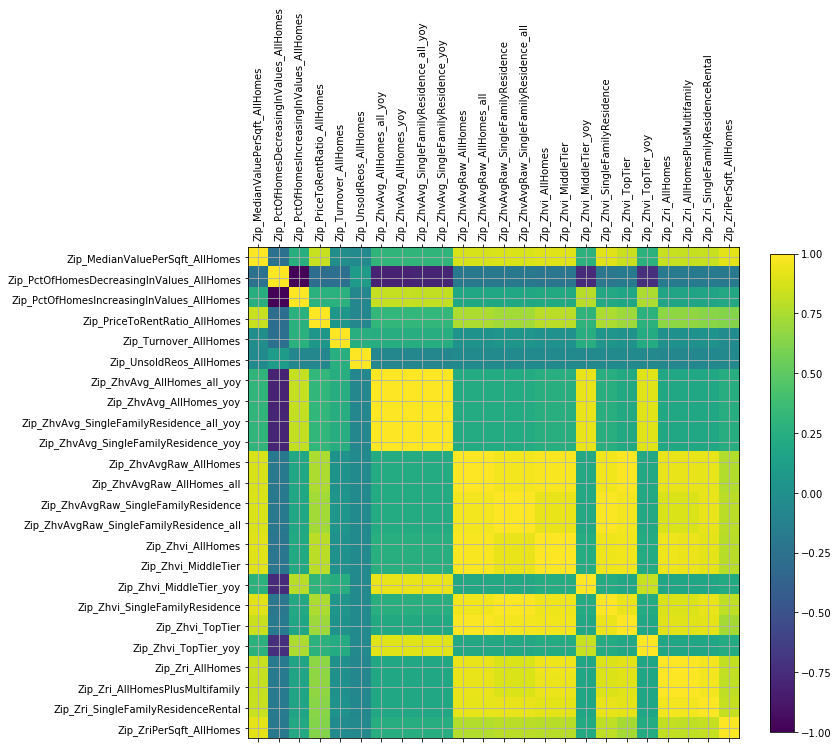

In [5]:
plot_corr(data)
corrMatrix = data.corr()
corrMatrix.to_csv('/Users/matt.fee/Projects/Mapping Data/Correlation.csv')

## Removing correlations of 1

In [6]:
# Zip_ZhvAvg_AllHomes_all_yoy              : Zip_ZhvAvg_AllHomes_yoy
# Zip_ZhvAvg_SingleFamilyResidence_all_yoy : Zip_ZhvAvg_SingleFamilyResidence_yoy
# Zip_ZhvAvg_SingleFamilyResidence_yoy     : Zip_ZhvAvgRaw_AllHomes_all
# Zip_ZhvAvgRaw_SingleFamilyResidence      : Zip_ZhvAvgRaw_SingleFamilyResidence_all
# Zip_Zhvi_AllHomes                        : Zip_Zhvi_MiddleTier

In [7]:
del data['Zip_ZhvAvg_AllHomes_yoy']
del data['Zip_ZhvAvg_SingleFamilyResidence_yoy']
del data['Zip_ZhvAvgRaw_AllHomes_all']
del data['Zip_ZhvAvgRaw_SingleFamilyResidence_all']
del data['Zip_Zhvi_MiddleTier']

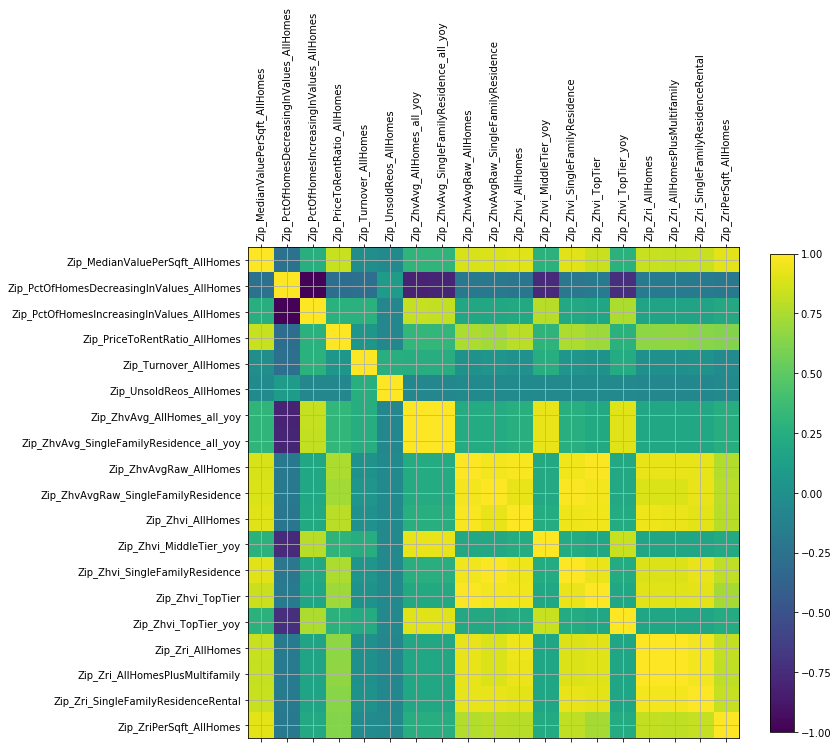

In [8]:
plot_corr(data)
corrMatrix = data.corr()
corrMatrix.to_csv('/Users/matt.fee/Projects/Mapping Data/Correlation1stRemoval.csv')

## 2nd Round Prediction

In [11]:
data_y = data[target_variable]
data_X = data.drop(target_variable, axis='columns')
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y)
reg = RandomForestRegressor()
#reg = MLPRegressor(hidden_layer_sizes=(25, 25, 25))
reg.fit(X_train, y_train)
print(reg.score(X_test, y_test))
print(reg.predict(X_test[:10]))
print(y_test[:10])

0.990295941912
[ 11.071  10.427  12.163  11.417   9.293  13.771  15.918  11.269   9.979
  12.846]
RegionName  Period 
35022       2012-07    10.47
85233       2012-01    10.63
6480        2012-12    12.04
80015       2012-09    11.12
44136       2015-05     9.29
28787       2013-06    13.94
1886        2014-12    15.68
12009       2015-05    11.12
21830       2014-08     9.81
7663        2012-06    12.83
Name: Zip_PriceToRentRatio_AllHomes, dtype: float64


## Removing correlations between .9 -> 1

In [12]:
# Zip_MedianValuePerSqft_AllHomes     : Zip_Zhvi_AllHomes,
#                                     : Zip_Zhvi_SingleFamilyResidence
#                                     : Zip_ZriPerSqft_AllHomes
# Zip_ZhvAvg_AllHomes_all_yoy         : Zip_ZhvAvg_SingleFamilyResidence_all_yoy
#                                     : Zip_Zhvi_MiddleTier_yoy
# Zip_ZhvAvgRaw_AllHomes              : Zip_ZhvAvgRaw_SingleFamilyResidence
#                      -removed Above : Zip_Zhvi_AllHomes
#                      -removed Above : Zip_Zhvi_SingleFamilyResidence
#                                     : Zip_Zhvi_TopTier
#                                     : Zip_Zri_AllHomes
#                                     : Zip_Zri_AllHomesPlusMultifamily
#                                     : Zip_Zri_SingleFamilyResidenceRental
# Zip_ZhvAvgRaw_SingleFamilyResidence : Zip_ZhvAvgRaw_AllHomes
#                      -removed Above : Zip_Zhvi_AllHomes
#                      -removed Above : Zip_Zhvi_SingleFamilyResidence
#                      -removed Above : Zip_Zhvi_TopTier
#                      -removed Above : Zip_Zri_SingleFamilyResidenceRental

In [13]:
del data['Zip_Zhvi_AllHomes']
del data['Zip_Zhvi_SingleFamilyResidence']
del data['Zip_ZriPerSqft_AllHomes']
del data['Zip_ZhvAvg_SingleFamilyResidence_all_yoy']
del data['Zip_Zhvi_MiddleTier_yoy']
del data['Zip_ZhvAvgRaw_SingleFamilyResidence']
del data['Zip_Zhvi_TopTier']
del data['Zip_Zri_AllHomes']
del data['Zip_Zri_AllHomesPlusMultifamily']
del data['Zip_Zri_SingleFamilyResidenceRental']
del data['Zip_ZhvAvgRaw_AllHomes']

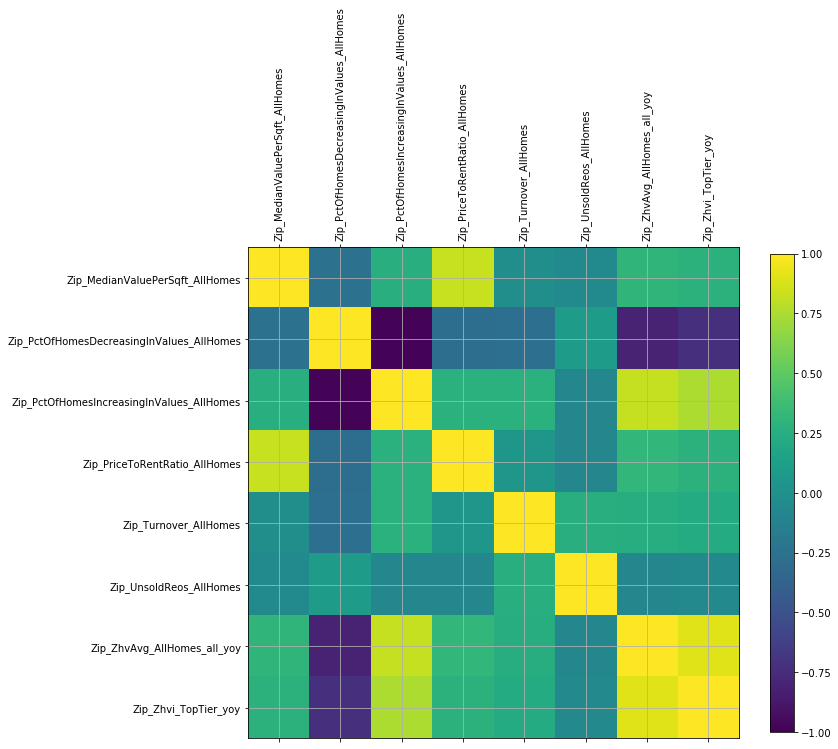

In [14]:
plot_corr(data)
corrMatrix = data.corr()
corrMatrix.to_csv('/Users/matt.fee/Projects/Mapping Data/Correlation2ndRemoval.csv')

## 3rd Round Prediction

In [15]:
data_y = data[target_variable]
data_X = data.drop(target_variable, axis='columns')
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y)
reg = RandomForestRegressor()
#reg = MLPRegressor(hidden_layer_sizes=(25, 25, 25))
reg.fit(X_train, y_train)
print(reg.score(X_test, y_test))
print(reg.predict(X_test[:10]))
print(y_test[:10])

0.889304010832
[ 30.467  13.837   6.773   9.995  12.133   8.973  13.094  17.325  13.306
   9.917]
RegionName  Period 
94041       2015-10    29.93
6357        2015-01    14.11
36618       2012-03     7.82
37725       2014-12    10.93
12054       2015-07    10.46
8046        2015-10     7.38
24590       2015-12    11.97
93405       2011-08    18.86
93602       2015-06    14.64
35127       2012-10    10.93
Name: Zip_PriceToRentRatio_AllHomes, dtype: float64
